In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import sys
sys.path.append('../../utils')
import lec7_graphs as afx

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## Arbol de decision

In [2]:
df = pd.read_csv('../../data/un4_vertebrate.csv')
print(df.shape)
df.sample(5, random_state=11238)      

(15, 8)


,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
8,cat,1,1,0,0,1,0,mammals
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
1,python,0,0,0,0,0,1,reptiles
14,salamander,0,0,1,0,1,1,amphibians


In [3]:
df['class'] = df['class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
store_y_labels = df['class'].unique()
df['class'] = np.where(df['class'] == 'mammals', 1, 0)
X_mat=df.drop(columns=['name', 'class'])

In [4]:
df.sort_values('class')

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
1,python,0,0,0,0,0,1,0
2,salmon,0,0,1,0,0,0,0
4,frog,0,0,1,0,1,1,0
5,komodo,0,0,0,0,1,0,0
7,pigeon,1,0,0,1,1,0,0
9,leopard shark,0,1,1,0,0,0,0
10,turtle,0,0,1,0,1,0,0
11,penguin,1,0,1,0,1,0,0
13,eel,0,0,1,0,0,0,0
14,salamander,0,0,1,0,1,1,0


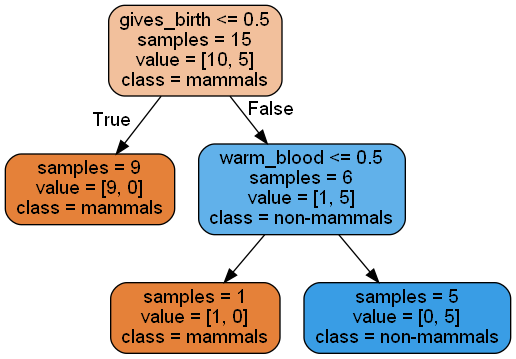

In [5]:
dec_tree = afx.demo_classfication_tree(X_mat, df['class'], store_y_labels)

Image(dec_tree.create_png())

In [6]:
question_1_pos = df.query('gives_birth == 1')
question_1_pos

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
0,human,1,1,0,0,1,0,1
3,whale,1,1,1,0,0,0,1
6,bat,1,1,0,1,1,1,1
8,cat,1,1,0,0,1,0,1
9,leopard shark,0,1,1,0,0,0,0
12,porcupine,1,1,0,0,1,1,1


In [6]:
question_1_neg = df.query('gives_birth == 0')
question_1_neg

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
1,python,0,0,0,0,0,1,0
2,salmon,0,0,1,0,0,0,0
4,frog,0,0,1,0,1,1,0
5,komodo,0,0,0,0,1,0,0
7,pigeon,1,0,0,1,1,0,0
10,turtle,0,0,1,0,1,0,0
11,penguin,1,0,1,0,1,0,0
13,eel,0,0,1,0,0,0,0
14,salamander,0,0,1,0,1,1,0


In [8]:
question_2_pos = question_1_pos.query('warm_blood == 1')
question_2_pos

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
0,human,1,1,0,0,1,0,1
3,whale,1,1,1,0,0,0,1
6,bat,1,1,0,1,1,1,1
8,cat,1,1,0,0,1,0,1
12,porcupine,1,1,0,0,1,1,1


In [9]:
question_2_neg = question_1_pos.query('warm_blood == 0')
question_2_neg

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
9,leopard shark,0,1,1,0,0,0,0


## Ejemplo con Scikit Learn

In [11]:
df = pd.read_csv('../../data/un4_cadata.csv', header=1).drop(columns='1')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedianHouseValue  20640 non-null  float64
 1   MedianIncome      20640 non-null  float64
 2   MedianHouseAge    20640 non-null  float64
 3   TotalRooms        20640 non-null  float64
 4   TotalBedrooms     20640 non-null  float64
 5   Population        20640 non-null  float64
 6   Households        20640 non-null  float64
 7   Latitude          20640 non-null  float64
 8   Longitude         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
print(df.sample(2,random_state=11238))

       MedianHouseValue  MedianIncome  MedianHouseAge  TotalRooms  \
16934          237500.0        3.8317             9.0      1150.0   
49             112500.0        1.7750            40.0       946.0   

       TotalBedrooms  Population  Households  Latitude  Longitude  
16934          287.0       377.0       243.0     37.56    -122.32  
49             375.0       700.0       352.0     37.82    -122.27  


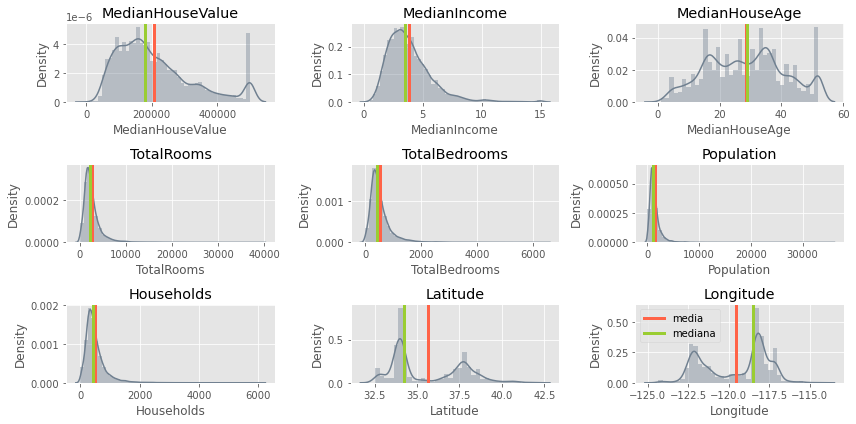

In [16]:
rows, cols = df.shape

cols = np.sqrt(cols)
plt.figure(figsize=(12, 6))

for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(cols, cols, index + 1)
    sns.distplot(serie, color='slategrey')
    plt.axvline(np.mean(serie), color='tomato', label = "media", lw=3)
    plt.axvline(np.median(serie), color='yellowgreen', label='mediana', lw=3)
    plt.title(colname)
plt.tight_layout()
plt.legend()

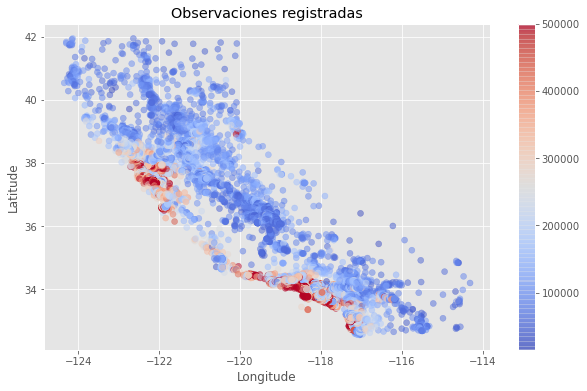

In [17]:
plt.scatter(df['Longitude'], df['Latitude'], c = df['MedianHouseValue'],
            cmap='coolwarm',alpha=.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Observaciones registradas');

In [18]:
from sklearn.model_selection import train_test_split

df['log_MedianHouseValue'] = np.log(df['MedianHouseValue'])
df['log_MedianIncome'] = np.log(df['MedianIncome'])
y = df['log_MedianHouseValue']
X = df.drop(columns=['MedianHouseValue', 'log_MedianHouseValue', 'MedianIncome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=11238)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

dec_tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Test MSE:", mean_squared_error(y_test,
dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test,
dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 0.10634
Test MAE: 0.15187
Test R2: 0.67703


## Hiperparametros

### Profundidad

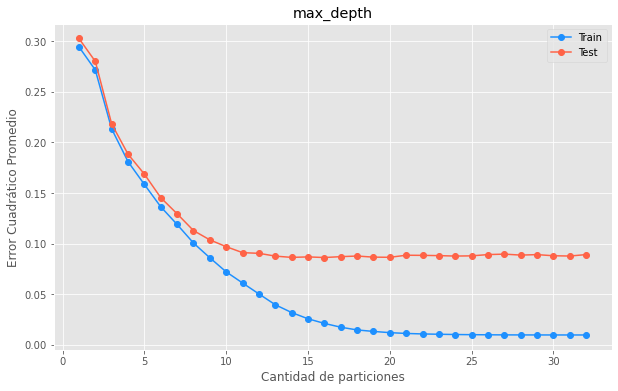

In [20]:
x_tr, x_te, y_tr, y_te = train_test_split(df.loc[:, ['Longitude', 'Latitude']],
                                          df['log_MedianHouseValue'],
                                          test_size=.33, random_state=11238)

param = {'max_depth': np.linspace(1, 32, 32)}
afx.train_test_over_params(DecisionTreeRegressor(), param, x_tr, x_te, y_tr, y_te)
plt.xlabel('Cantidad de particiones');
plt.ylabel('Error Cuadrático Promedio');

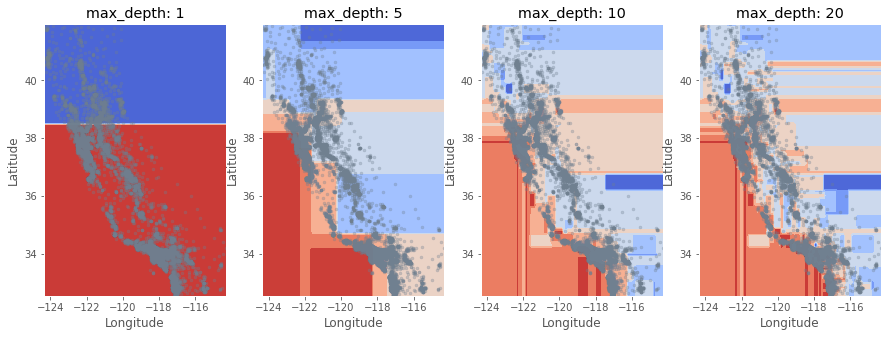

In [21]:
plt.figure(figsize=(15, 5))

for index, value in enumerate([1, 5, 10, 20]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(max_depth=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude',
                               'log_MedianHouseValue',colorbar=False)
    plt.title("max_depth: {}".format(value))

### Cantidad de atributos

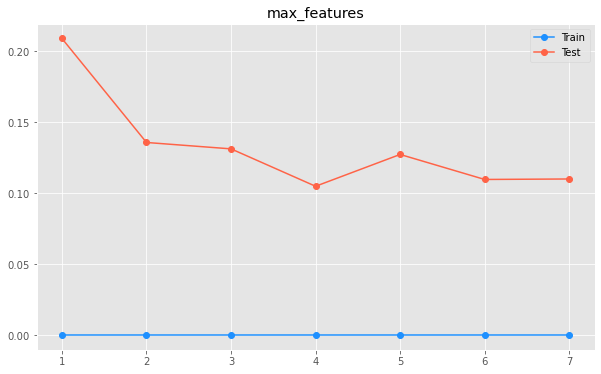

In [22]:
param = {'max_features': list(range(1,X_train.shape[1]))}
afx.train_test_over_params(DecisionTreeRegressor(), param, X_train, X_test, y_train, y_test)

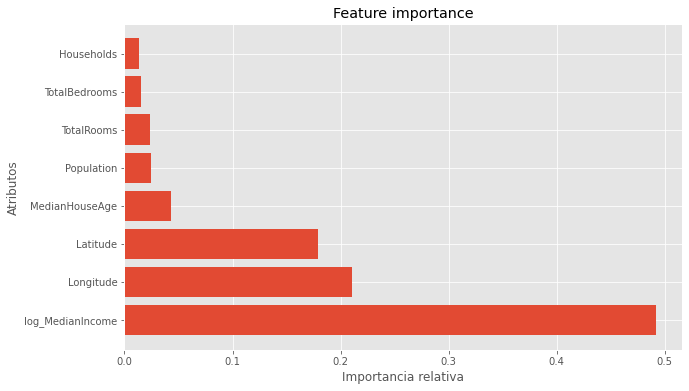

In [23]:
afx.plot_importance(dec_tree, X.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

### Minimo de muestras para dividir

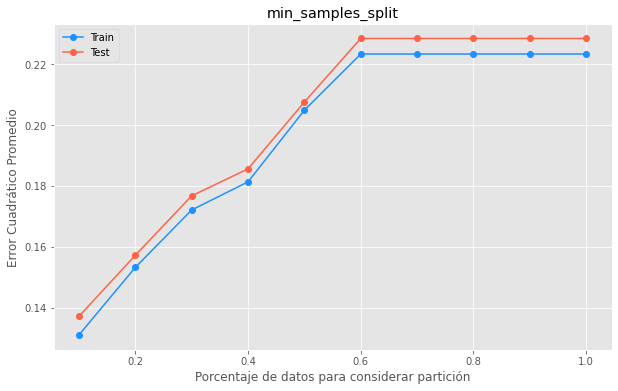

In [24]:
param = {'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}
afx.train_test_over_params(DecisionTreeRegressor(), param, X_train, X_test, y_train, y_test)
plt.xlabel('Porcentaje de datos para considerar partición')
plt.ylabel('Error Cuadrático Promedio');

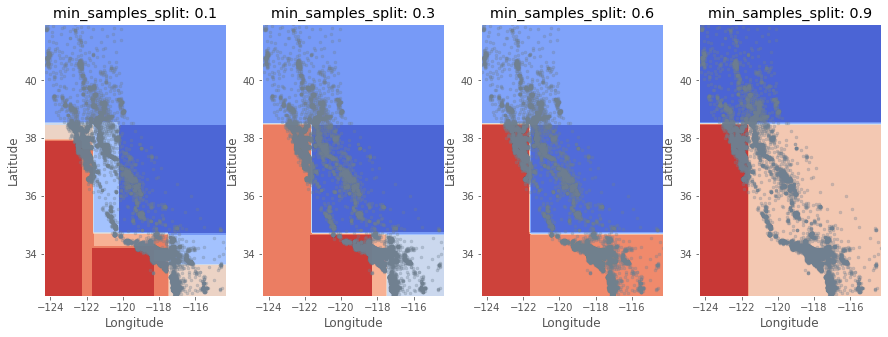

In [25]:
plt.figure(figsize=(15, 5))
for index, value in enumerate([0.1, 0.3,0.6, 0.9]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(min_samples_split=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude', 
                               'log_MedianHouseValue',colorbar=False)
    plt.title("min_samples_split: {}".format(value))

## Min muestras por hoja

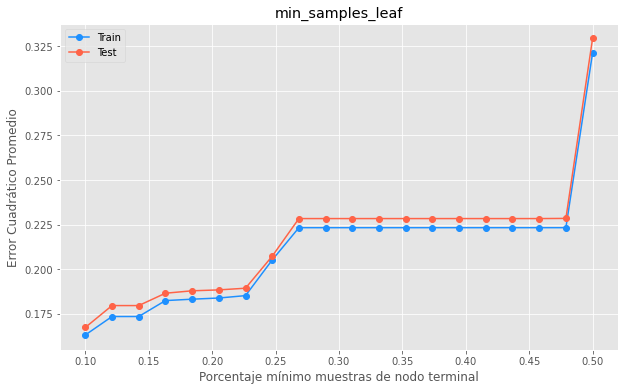

In [26]:
param = {'min_samples_leaf': np.linspace(0.1, 0.5, 20, endpoint=True)}
afx.train_test_over_params(DecisionTreeRegressor(), param, X_train, X_test, y_train, y_test)
plt.xlabel('Porcentaje mínimo muestras de nodo terminal')
plt.ylabel('Error Cuadrático Promedio');

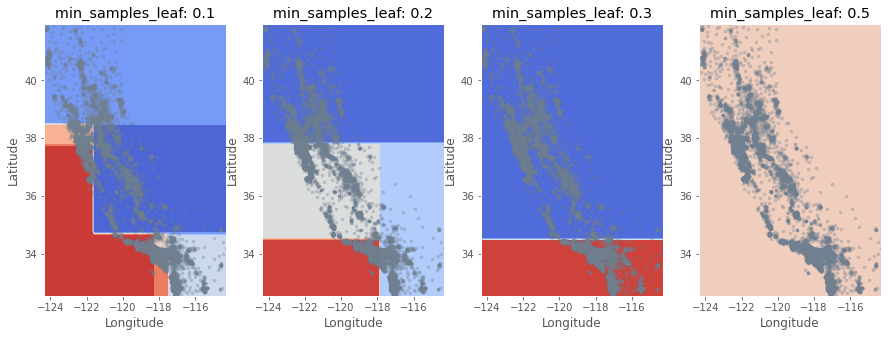

In [27]:
plt.figure(figsize=(15, 5))
for index, value in enumerate([0.1,.20, .3, 0.5]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(min_samples_leaf=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude',
                               'log_MedianHouseValue',colorbar=False)
    plt.title("min_samples_leaf: {}".format(value))

## Decision Tree para clasificar

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Importamos la base de datos
df = pd.read_csv('../../data/un4_voting.csv').drop(columns='Unnamed: 0')
print(df.sample(1, random_state=11238))

    region  population sex   age education   income  statusquo vote
206      N        3750   M  21.0         P  15000.0   -0.04558    N


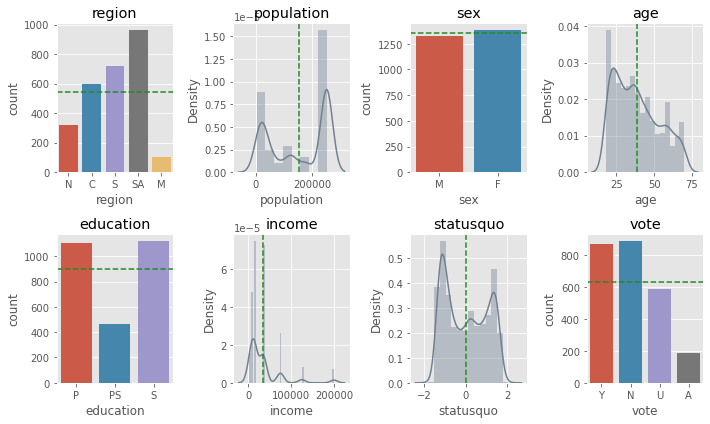

In [33]:
rows = 2
cols = df.shape[1] // rows
for index, (colnames, serie) in enumerate(df.iteritems()):
    plt.subplot(rows, cols, index + 1)
    if serie.dtype == 'object':
        sns.countplot(serie.dropna())
        plt.axhline(serie.value_counts().mean(), color='forestgreen', linestyle='--')
        plt.title(colnames)
    else:
        sns.distplot(serie.dropna(), color='slategrey')
        plt.axvline(serie.mean(), color='forestgreen', linestyle='--')
        plt.title(colnames)
plt.tight_layout()

In [34]:
df = pd.concat([df, pd.get_dummies(df['region'], drop_first=True, prefix='region')], axis=1)

df = pd.concat([df, pd.get_dummies(df['education'], drop_first=True, prefix='ed')], axis=1)
df = pd.concat([df, pd.get_dummies(df['sex'], drop_first=True, prefix='sex')], axis=1)
df = pd.concat([df, pd.get_dummies(df['vote'], drop_first=False, prefix='vote')], axis=1)

df = df.drop(columns=['region', 'sex', 'education', 'vote'])
df.sample()      

,population,age,income,statusquo,region_M,region_N,region_S,region_SA,ed_PS,ed_S,sex_M,vote_A,vote_N,vote_U,vote_Y
640,15000,54.0,75000.0,1.30775,0,0,0,0,1,0,0,0,0,0,1


In [35]:
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'population':'sex_M'],
                                                    df['vote_N'],
                                                    test_size=.33, random_state=11238)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {'min_samples_split': np.linspace(0.1, 1.0, 10),
          'criterion': ['gini', 'entropy'],
          'max_depth': np.linspace(1, 32, 32),
          'min_samples_leaf': np.linspace(0.1, 0.5, 10),
          'max_features': list(range(1,X_train.shape[1]))}

In [38]:
%time
dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(), params,
                                cv=5, n_jobs=-1).fit(X_train, y_train)

Wall time: 0 ns


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dec_tree_grid_cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       572
           1       0.73      0.64      0.68       283

    accuracy                           0.80       855
   macro avg       0.78      0.76      0.77       855
weighted avg       0.80      0.80      0.80       855

